# Clasificaci&oacute;n - Shopping trends updated

<p>Click para acceder el conjunto de datos <a href="https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset">Shopping Trends Updated</a>.</p>

<style>
    .imagen-ajustada {
        width: 900px;
        height: 280px;
        border-radius: 20px;
    }
</style>

<img src="shopping.jpg" alt="Una imagen" class="imagen-ajustada">

Este conjunto de datos abarca varias caracter&iacute;sticas relacionadas con las preferencias de compra que tienen los clientes y recopila informaci&oacute;n esencial para la empresa, con el fin de mejorar la comprensi&oacute;n de su base de clientes. Las caracter&iacute;sticas incluyen edad, sexo, monto de la compra, m&eacute;todos de pago preferidos, frecuencia de las compras y las calificaciones de calificaciones del cliente. Tambi&eacute;n incluye datos sobre el tipo de art&iacute;culos comprados, la frecuencia en que se compro, temporada de compra preferida e interacciones con ofertas promocionales.
Este conjunto de datos sirve como base para las empresas que buscan aplicar conocimientos basados ​​en datos para una mejor toma de decisiones y estrategias centradas en el cliente.

Las caracter&iacute;sticas mencionadas son:
- ID de cliente : ID de cada cliente
- Edad : Edad del cliente
- Género : Género del cliente (Hombre/Mujer)
- Artículo comprado : Artículo comprado por el cliente.
- Categoría : Categoría del artículo comprado
- Monto de la compra (USD) : Monto de la compra en USD.
- Ubicación : Ubicación donde se realizó la compra
- Tamaño : Tamaño del artículo comprado
- Color : Color del artículo comprado
- Temporada : Temporada durante la cual se realizó la compra.
- Calificación de revisión : Calificación otorgada por el cliente para el artículo comprado
- Estado de suscripción : Indica si el cliente tiene una suscripción (Sí/No)
- Tipo de envío : Tipo de envío elegido por el cliente
- Descuento Aplicado : Indica si se aplicó un descuento a la compra (Sí/No)
- Código de promoción utilizado : Indica si se utilizó un código de promoción para la compra (Sí/No)
- Compras anteriores : Recuento total de transacciones realizadas por el cliente en la tienda, excluyendo la transacción en curso.
- Método de pago : Método de pago preferido del cliente
- Frecuencia de compras : Frecuencia con la que el cliente realiza compras (por ejemplo, semanal, quincenal, mensual).

El objetivo de este an&aacute;lisis de datos es visualizar con que frecuencia los clientes hacen sus compras ya se de forma semanal, quicenal, trimestral, mensual y anual.

Primero se importan las librer&iacute;as necesarias para utilizar el conjunto de datos.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import StratifiedKFold

Luego se importa el conjunto de datos en un dataframe para mejor manipulaci&oacute;n de datos.

In [2]:
df = pd.read_csv('shopping_trends_updated.csv')

Se despliegan la cabecera del conjunto de datos para as&iacute; conocer que contiene cada uno de esto y as&iacute; poder conocer los datos a profundidad.

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


Aqu&iacute; podemos ver que no hay datos nulos en el conjunto de datos, adem&aacute;s se puede observar que los datos son de tipo entero, object y float.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

Con esta funci&oacute;n podemos observar que hace un resumen de las estad&iacute;sticas del dataframe, trayendo consigo: el conteo de las variables, su media, desviaci&oacute;n est&aacute;ndar, el valor m&iacute;nimo, el n&uacute;mero variables en su 25%, 50% y 75%, por &uacute;ltimo trae el valor m&aacute;ximo de las variables.

In [5]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


Con el histograma podemos observar como es la distribuci&oacute;n de datos n&uacute;mericos 

array([[<Axes: title={'center': 'Customer ID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Purchase Amount (USD)'}>,
        <Axes: title={'center': 'Review Rating'}>],
       [<Axes: title={'center': 'Previous Purchases'}>, <Axes: >]],
      dtype=object)

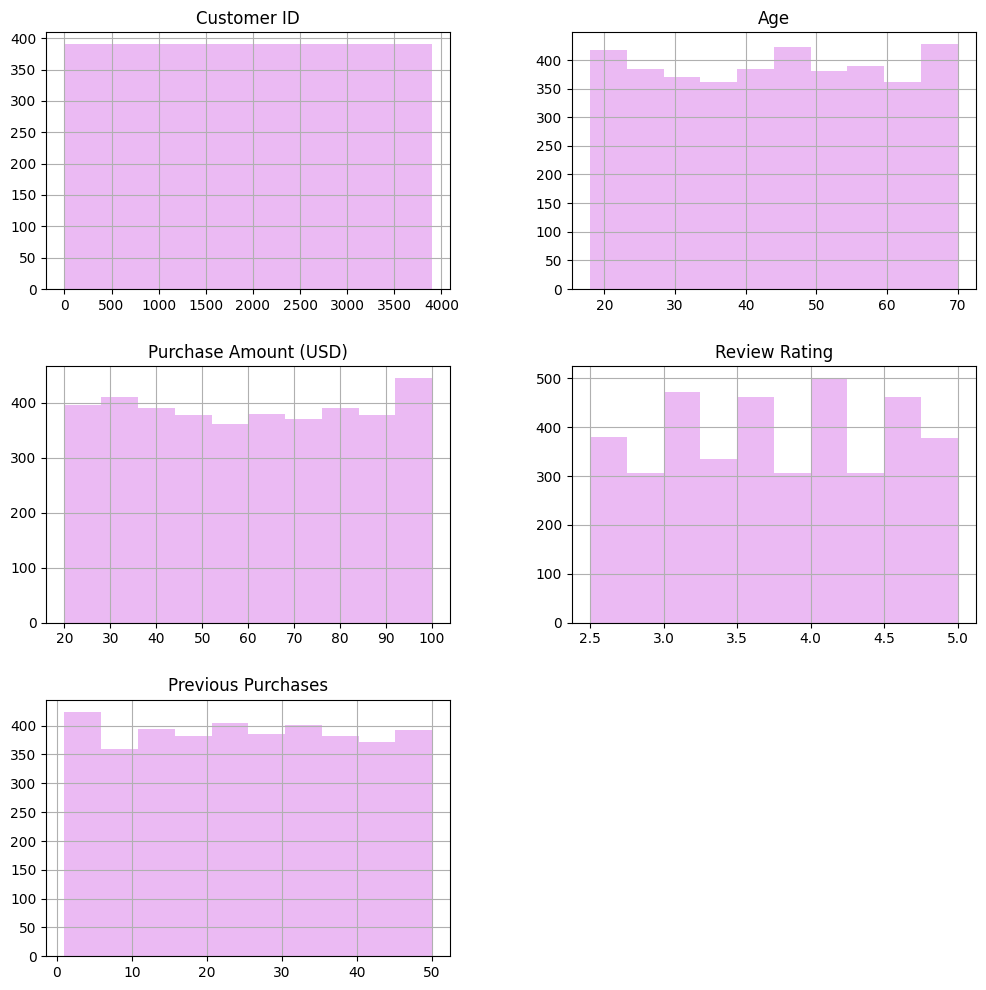

In [6]:
df.hist(figsize=(12,12), color="#EBBAF3") 

Se debe de checar que no haya valores NaN en el conjunto de datos para poder avanzar en el proceso, y por los resultados podemos apreciar que no hay valor de este estilo.

In [7]:
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

# Limpieza de datos

El nombre de las columnas tiene una notaci&oacute;n Camel Case, por lo cual lo pasaremos a Snake Case con el prop&oacute;sito de guardar un registro m&aacute;s limpio al momento de acceder a las columnas del dataframe.

In [8]:
df.columns = df.columns.str.lower()
df.columns = df.columns.map(lambda x:x.replace("-", "_").replace(" ","_"))
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

Hay que ver si hay datos duplicados, pero podemos ver que no hay.

In [9]:
df.duplicated().sum()


0

Checamos por segunda vez si no hay datos nulos en las columnas del conjunto de datos, viendo as&iacute; que no hay.

In [10]:
print("Missing values distribution: ")
print(df.isnull().mean())
print("")

Missing values distribution: 
customer_id               0.0
age                       0.0
gender                    0.0
item_purchased            0.0
category                  0.0
purchase_amount_(usd)     0.0
location                  0.0
size                      0.0
color                     0.0
season                    0.0
review_rating             0.0
subscription_status       0.0
shipping_type             0.0
discount_applied          0.0
promo_code_used           0.0
previous_purchases        0.0
payment_method            0.0
frequency_of_purchases    0.0
dtype: float64



## Ingenier&iacute;a de caracter&iacute;sticas

Para un mejor procesamiento de datos, se ha decidido hacer ingenier&iacute;a de caracter&iacute;sticas para poder trabajar con los datos. En este caso vamos a tratar las variables n&uacute;mericas para que tengan un valor menor a 1 y sea f&aacute;cil trabajar con ellas.

In [11]:
from sklearn.preprocessing import RobustScaler

for col in ["age", "purchase_amount_(usd)", "review_rating", "previous_purchases"]:
    df.loc[:, [col]] = RobustScaler().fit_transform(df[[col]])
    
df[["age","purchase_amount_(usd)", "review_rating", "previous_purchases"]]    


,age,purchase_amount_(usd),review_rating,previous_purchases
0,0.423077,-0.166667,-0.461538,-0.44
1,-0.961538,0.095238,-0.461538,-0.92
2,0.230769,0.309524,-0.461538,-0.08
3,-0.884615,0.714286,-0.153846,0.96
4,0.038462,-0.261905,-0.769231,0.24
...,...,...,...,...
3895,-0.153846,-0.761905,0.384615,0.28
3896,0.307692,-0.261905,0.615385,0.64
3897,0.076923,-0.642857,-0.615385,-0.04
3898,0.000000,0.404762,0.076923,-0.04


En este caso, se transforman las variables categ&oacute;ricas en valores num&eacute;ricos del 0 al 1.

In [12]:
from sklearn.preprocessing import LabelEncoder

for col in ["gender", "subscription_status", "discount_applied", "promo_code_used"]:
    df.loc[:, [col]] = LabelEncoder().fit_transform(df[[col]])
    
df[["gender", "subscription_status", "discount_applied", "promo_code_used"]]



,gender,subscription_status,discount_applied,promo_code_used
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
3895,0,0,0,0
3896,0,0,0,0
3897,0,0,0,0
3898,0,0,0,0


Por &uacute;ltimo se transforman las caracter&iacute;sticas categ&oacute;ricas en enteros para poder manejar los datos.

In [13]:
from sklearn.preprocessing import OrdinalEncoder

for col in ["item_purchased", "category", "location", "size", "color", "season", "shipping_type", "payment_method"]:
    df.loc[:, [col]] = OrdinalEncoder().fit_transform(df[[col]])
    
df[["item_purchased", "category", "location", "size", "color", "season", "shipping_type", "payment_method"]]


,item_purchased,category,location,size,color,season,shipping_type,payment_method
0,2.0,1.0,16.0,0.0,7.0,3.0,1.0,5.0
1,23.0,1.0,18.0,0.0,12.0,3.0,1.0,1.0
2,11.0,1.0,20.0,2.0,12.0,1.0,2.0,2.0
3,14.0,2.0,38.0,1.0,12.0,1.0,3.0,4.0
4,2.0,1.0,36.0,1.0,21.0,1.0,2.0,4.0
...,...,...,...,...,...,...,...,...
3895,9.0,1.0,45.0,0.0,21.0,2.0,0.0,5.0
3896,0.0,0.0,14.0,0.0,23.0,1.0,5.0,0.0
3897,1.0,0.0,29.0,0.0,8.0,1.0,4.0,5.0
3898,17.0,2.0,22.0,2.0,3.0,2.0,1.0,5.0


Aqui podemos apreciar que las variables cambiaron de object a int para un mejor manejo de las mismas.

array([[<Axes: title={'center': 'customer_id'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'purchase_amount_(usd)'}>,
        <Axes: title={'center': 'review_rating'}>],
       [<Axes: title={'center': 'previous_purchases'}>, <Axes: >]],
      dtype=object)

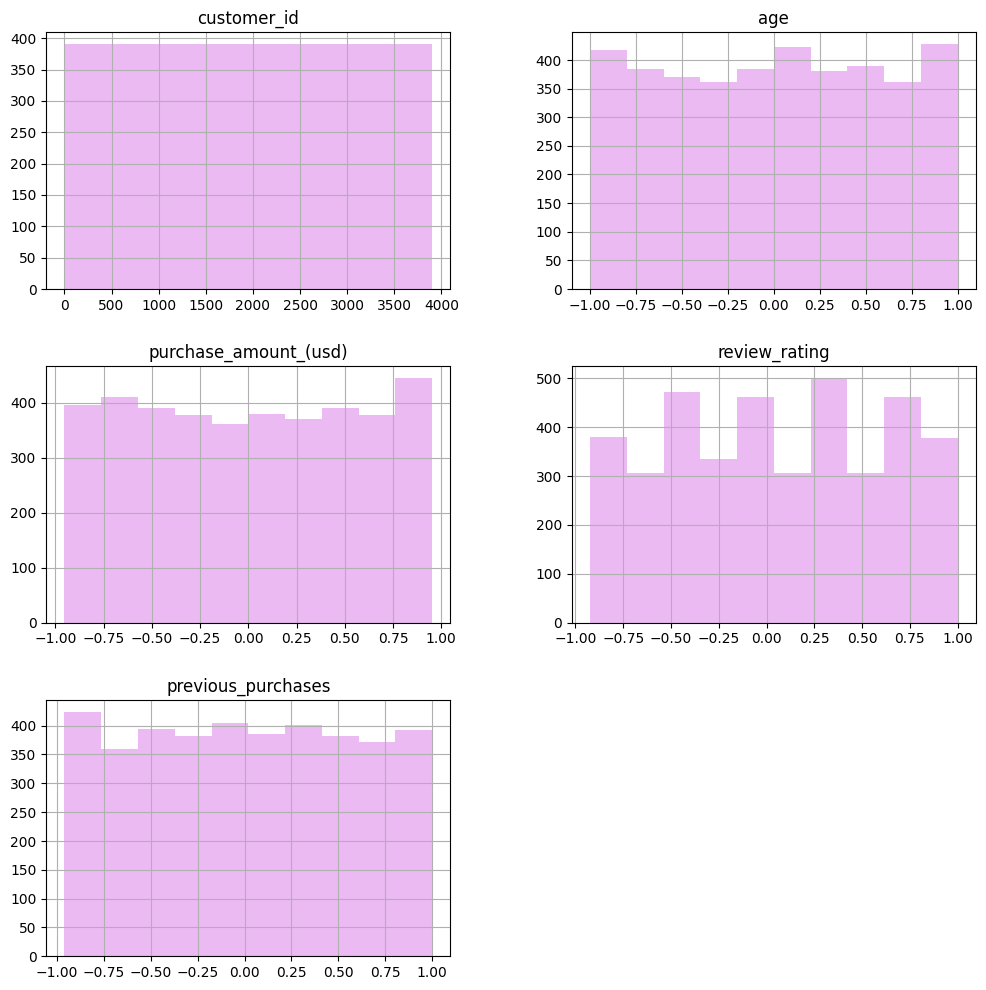

In [14]:
df.hist(figsize=(12,12), color="#EBBAF3") 

# Validaci&oacute;n cruzada

En esta secci&oacute;n se manejara la validaci&oacute;n cruzada, primero separamos los datos en X e Y, donde X son los datos dependientes, adem&aacute;s de que Y es el dato independiente.

In [15]:
X = df[['customer_id', 'age', 'gender', 'item_purchased', 'category', 'purchase_amount_(usd)', 'location', 'size', 
       'color', 'season', 'review_rating', 'subscription_status', 'shipping_type','discount_applied', 
       'promo_code_used', 'previous_purchases','payment_method']]
y = df['frequency_of_purchases']
y



0       Fortnightly
1       Fortnightly
2            Weekly
3            Weekly
4          Annually
           ...     
3895         Weekly
3896      Bi-Weekly
3897      Quarterly
3898         Weekly
3899      Quarterly
Name: frequency_of_purchases, Length: 3900, dtype: object

Los datos se separan en datos de entrenamiento (80%) y los datos de prueba (20%).

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier()

In [18]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [19]:
puntajes = cross_val_score(modelo, X_train, y_train, cv=kf, scoring='accuracy')

Aqu&iacute; obtenemos el puntaje promedio por medio de la validaci&oacute;n cruzada.

In [20]:
for i, puntaje in enumerate(puntajes):
    print(f"División {i + 1}: {puntaje}")
print(f"Puntaje promedio: {puntajes.mean()}")

División 1: 0.15224358974358973
División 2: 0.13782051282051283
División 3: 0.14903846153846154
División 4: 0.16025641025641027
División 5: 0.14262820512820512
Puntaje promedio: 0.1483974358974359


Para ver como funcionan mejor los datos, se pasaron por 10 modelos de inferencia para ver donde le va mejor.

In [21]:
X = df[['customer_id', 'age', 'gender', 'item_purchased', 'category', 'purchase_amount_(usd)', 'location', 'size', 
       'color', 'season', 'review_rating', 'subscription_status', 'shipping_type','discount_applied', 
       'promo_code_used', 'previous_purchases','payment_method']]
y = df['frequency_of_purchases']
y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelos = [
    ("Nearest Neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("RBF SVM", SVC(gamma=2, C=1)),
    ("Gaussian Process", GaussianProcessClassifier(1.0 * RBF(1.0))),
    ("Decision Tree", DecisionTreeClassifier(max_depth=5)),
    ("Random Forest", RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)),
    ("Neural Net", MLPClassifier(alpha=1, max_iter=1000)),
    ("AdaBoost", AdaBoostClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("QDA", QuadraticDiscriminantAnalysis()),
    ("Linear SVM", SVC(kernel='linear'))
]

In [22]:
# Crear un DataFrame vacío para almacenar las métricas
metricas_df = pd.DataFrame(columns=['Modelo', 'Exactitud', 'Sensibilidad', 'Especificidad'])


In [23]:
# Realizar la validación cruzada con k-folds (k=10 en este ejemplo)
k_folds = 10
skf = StratifiedKFold(n_splits=k_folds)

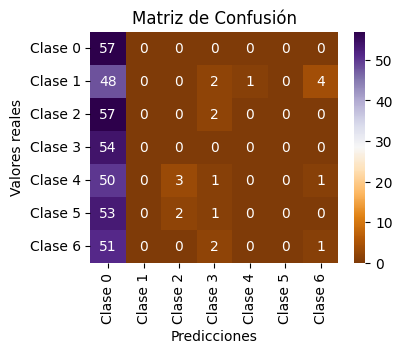

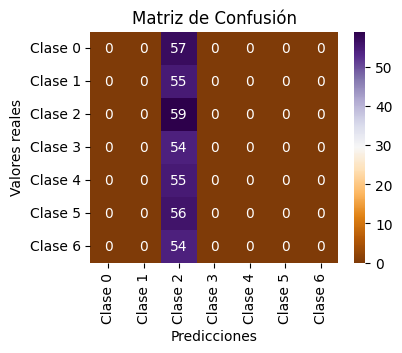

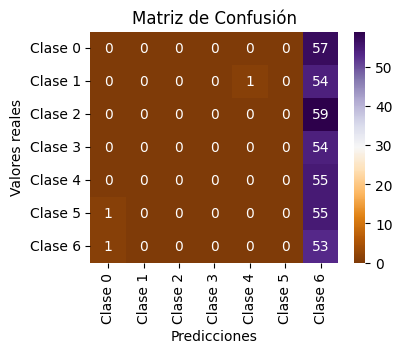

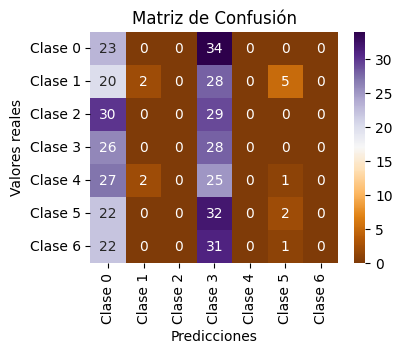

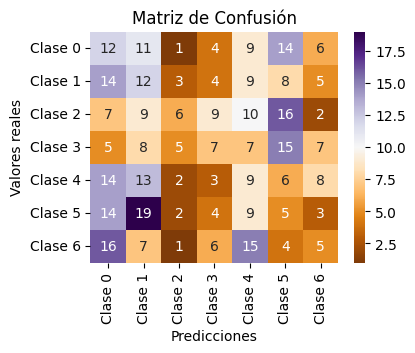

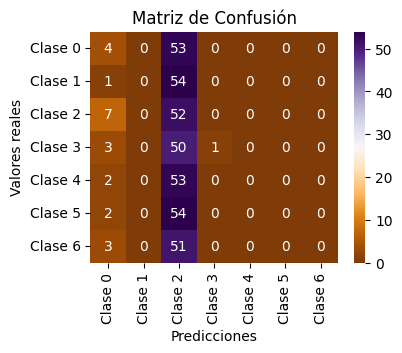

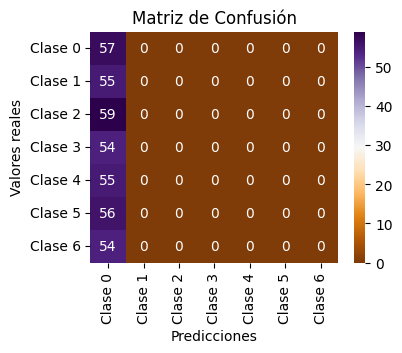

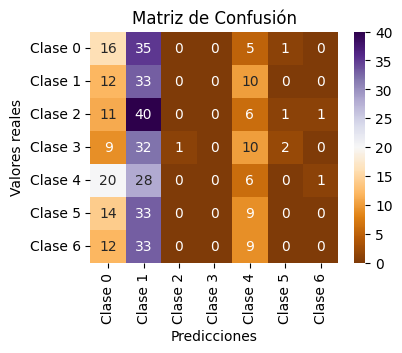

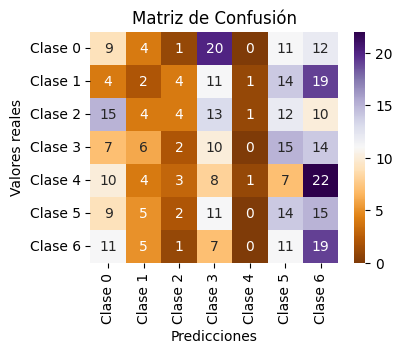

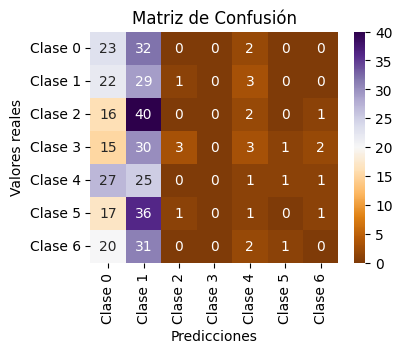

              Modelo  Exactitud  Sensibilidad  Especificidad
0  Nearest Neighbors  14.839744      0.000000     100.000000
1            RBF SVM  14.839744           NaN            NaN
2   Gaussian Process  14.839744           NaN            NaN
3      Decision Tree  14.839744      9.090909     100.000000
4      Random Forest  14.839744     46.153846      52.173913
5         Neural Net  14.839744      0.000000     100.000000
6           AdaBoost  14.839744      0.000000     100.000000
7        Naive Bayes  14.839744     73.333333      31.372549
8                QDA  14.839744     33.333333      69.230769
9         Linear SVM  14.839744     56.862745      41.818182


In [24]:
for nombre, modelo in modelos:
    
    sensibilidades = []
    especificidades = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Se entrena el modelo
        modelo.fit(X_train, y_train)
        
        # Predicciones
        y_pred = modelo.predict(X_test)
        
        # Se calcula la matriz de confusion 
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Se calcula la sensibilidad y la especificidad
        sensibilidad = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
        especificidad = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
        
        sensibilidades.append(sensibilidad)
        especificidades.append(especificidad)

    # Agregamos métricas al DataFrame
    metrics = {
        'Modelo': nombre,
        'Exactitud': puntajes.mean() * 100,
        'Sensibilidad': sensibilidad * 100,
        'Especificidad': especificidad * 100
    }
    metricas_df = pd.concat([metricas_df, pd.DataFrame(metrics, index=[0])], ignore_index=True)

    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Heatmap de la matriz de confusión
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuOr',
                xticklabels=['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4', 'Clase 5', 'Clase 6'], 
                yticklabels=['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4', 'Clase 5', 'Clase 6'])
    plt.xlabel('Predicciones')
    plt.ylabel('Valores reales')
    plt.title('Matriz de Confusión')
    plt.show()

# Imprimimos la tabla de métricas
print(metricas_df)


    